In [6]:
import scipy, sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
sys.path.append("/Users/alex/Desktop/Fabry-Perot/modelling")
import read_csv, T_and_R

In [7]:
data = read_csv.read_csv("/Users/alex/Desktop/Fabry-Perot/data/InGaN_FTIR.csv")
# von cm zu m 
frequenz = scipy.constants.c * np.array(data[0]) * 100
frequenz

array([2.39815071e+14, 2.39800616e+14, 2.39786160e+14, ...,
       1.20124367e+13, 1.19979813e+13, 1.19835259e+13])

In [8]:
wavelength = scipy.constants.c/frequenz
wavelength

array([1.25009849e-06, 1.25017385e-06, 1.25024921e-06, ...,
       2.49568399e-05, 2.49869084e-05, 2.50170494e-05])

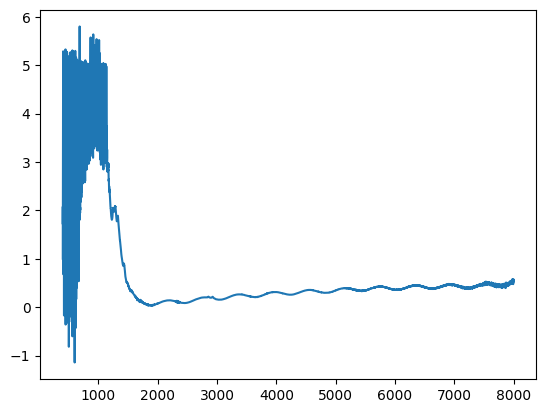

In [9]:
plt.plot(data[0],data[1])

In [10]:
# return index of a sorted list wherelist[index] is a specific value
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [11]:
N = 1200
smooth = np.convolve(data[1], np.ones(N)/N, mode='same')

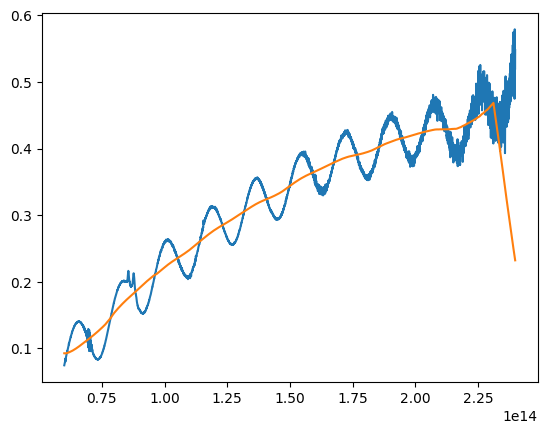

In [12]:
cutoff = find_nearest(frequenz, 0.6e14)
plt.plot(frequenz[:cutoff],data[1][:cutoff])
plt.plot(frequenz[:cutoff],smooth[:cutoff])

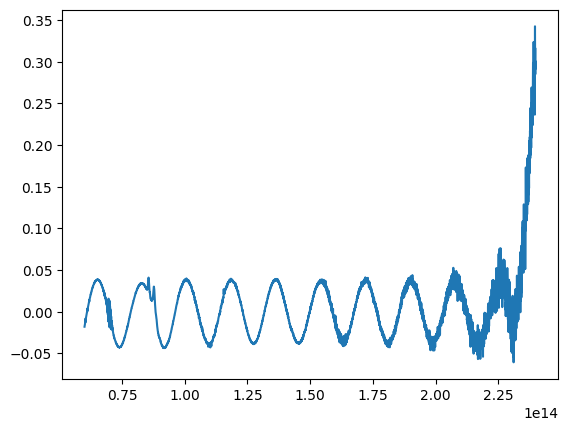

In [13]:
smoothed_out = data[1]-smooth
plt.plot(frequenz[:cutoff],smoothed_out[:cutoff])

In [14]:
minima_index= scipy.signal.argrelmin(smoothed_out[:cutoff],order = 150)
minima_index

(array([  602,  1585,  2823,  4020,  5300,  6524,  7769,  8968, 10229,
        11481]),)

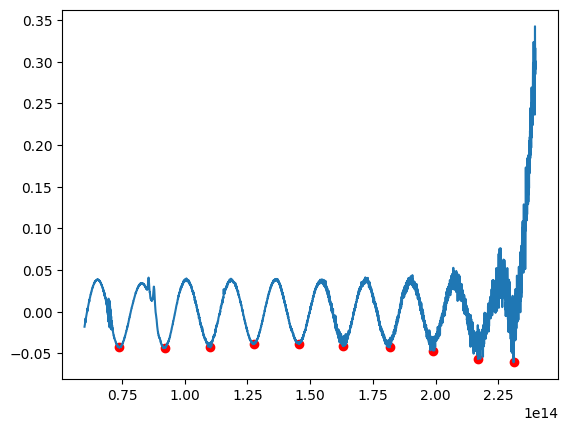

In [15]:
minima_frequenz = []
minima_absorption = []
for minimum in minima_index[0]:
    minima_frequenz.append(frequenz[minimum])
    minima_absorption.append(smoothed_out[minimum])

plt.scatter(minima_frequenz,minima_absorption, color = 'red')
plt.plot(frequenz[:cutoff],smoothed_out[:cutoff])

In [16]:
m_array = []
for i in range(0,len(minima_frequenz)-1):
    m_array.append(minima_frequenz[i+1]/(minima_frequenz[i]-minima_frequenz[i+1]))
m_array

[15.264496456317048,
 11.120355404159199,
 10.50125313054804,
 8.820312507607538,
 8.223856203723898,
 7.0851405631200315,
 6.356964140812775,
 5.044409194276128,
 4.080670930861201]

In [17]:
cleaned_m_array = np.arange(4,13,1)
cleaned_m_array = cleaned_m_array[::-1]

In [18]:
#calculate the refractive index through the calculated m
def refractive_index(m,L,f):
    wavelength = scipy.constants.c/f
    n = (m * wavelength) / (2 * L)
    return n 

In [19]:
n_array = []
for i in range(len(m_array)):
    n_array.append(refractive_index(cleaned_m_array[i],3.5e-6,minima_frequenz[i]))
n_array

[2.2237178529701103,
 2.171947191711713,
 2.1520544921993436,
 2.1212888444870153,
 2.099368233273093,
 2.060315312530317,
 2.015236426282879,
 1.943540684281102,
 1.8630614177530747]

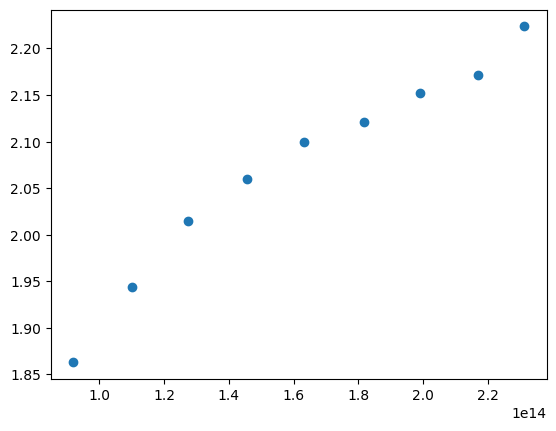

In [20]:
plt.scatter(minima_frequenz[:-1],n_array)

In [21]:
def polynomial(x,a0,a1,a2,a3):
    return a0 + a1*x + a2*x**2 + a3*x**3

In [22]:
import scipy.optimize
param, opt = scipy.optimize.curve_fit(polynomial,minima_frequenz[:-1],n_array)

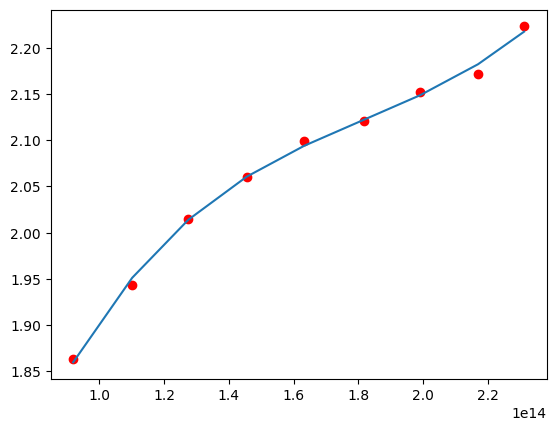

In [23]:
plt.plot(minima_frequenz[:-1],polynomial(np.array(minima_frequenz[:-1]),*param))
plt.scatter(minima_frequenz[:-1],n_array,color = "red")

Modelling of the Transmission & Absorption using the calculated refractive index

In [24]:
Transmission = T_and_R.Transmission
Reflectance = T_and_R.reflectance

In [26]:
T_array = []
for f in frequenz[:cutoff]:
    wavelength_nm = scipy.constants.c/f * 1e9
    r = Reflectance(polynomial(f,*param),1)
    optdick = polynomial(f,*param) * 3.5e-6
    T_array.append(Transmission(lam = wavelength_nm,r = r, optdick = optdick))
    

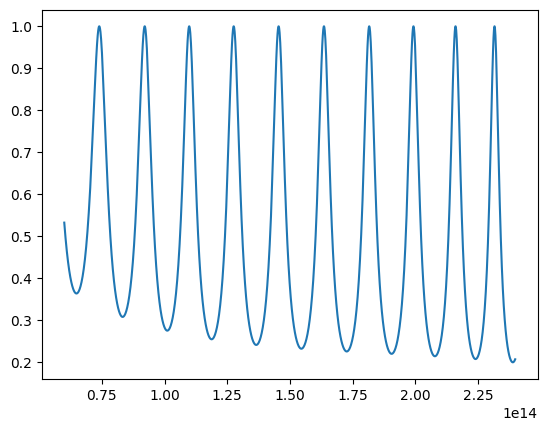

In [27]:
plt.plot(frequenz[:cutoff],T_array)

In [28]:
plt.plot(frequenz[:cutoff],1-T_array)

TypeError: unsupported operand type(s) for -: 'int' and 'list'